In [1]:
import pandas as pd
import numpy as np

# Read all data and set hn as index

In [2]:
df = pd.read_csv('ultima_all_clean.csv')
df = df.set_index('hn')
df.head()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Data Preprocessing

Check number of data

In [3]:
df.shape

(1723, 23)

Check any missing data in each column

In [4]:
df.isnull().sum(axis=0)

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

Delete column with missing data

In [5]:
df_clean_column = df.drop(['appearance','Wardsize','RHlvsi','depth'],axis = 1)
df_clean_column.isnull().sum(axis=0)

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
stage          24
pchemo          1
finalhisto     10
nodeyiel       12
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

Delete row with at least 1 missing data

In [6]:
df_clean = df_clean_column.dropna(axis = 0)

Total Clean Data

In [7]:
df_clean.shape

(1544, 19)

Check number of sample in pelvicme class 

In [8]:
pel_class = np.unique(df_clean['pelvicme'])
pel_class

array([0., 1., 3.])

In [9]:
pel_value = [sum(df_clean['pelvicme']==pel_class[0]),
             sum(df_clean['pelvicme']==pel_class[1]),
             sum(df_clean['pelvicme']==pel_class[2]) ]
pel_value

[1220, 304, 20]

Create dataset for pelvicme dataset by remove sample with label as 3

In [10]:
removeIndex = df_clean.index[df_clean['pelvicme']==3]
pelvicme = df_clean.drop(removeIndex)
pelvicme.shape

(1524, 19)

Separate pelviceme dataset into data (X) and label (y)

In [11]:
y = pelvicme['pelvicme'].values
X = pelvicme.drop(['pelvicme'],axis = 1).values

Randomly choose 200 samples of class 1 (positive) as training data and the rest as test data

In [12]:
import random
random.seed(1)
positive_index = np.where(y==1)[0]
negative_index = np.where(y==0)[0]
pos_train_index = random.sample(list(positive_index),200)
pos_test_index = list(set(positive_index) - set(pos_train_index))

print("All dataset: "+str(len(positive_index))+" "+str(len(negative_index)))
print("Positive test dataset: "+str(len(pos_test_index)))

All dataset: 304 1220
Positive test dataset: 104


Randomly separate negative dataset into 5 parts to create 5 training datasets consisted of 200 samples

In [13]:
neg_train_index1 = random.sample(list(negative_index),200)
neg_tmp_index = list(set(negative_index) - set(neg_train_index1))

neg_train_index2 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index2))

neg_train_index3 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index3))

neg_train_index4 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index4))

neg_train_index5 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index5))

neg_test_index = neg_tmp_index
print("Negative test dataset: "+str(len(neg_test_index)))

Negative test dataset: 220


Create 5 training dataset and 1 test dataset

In [14]:
X_train1 = np.concatenate((X[neg_train_index1,:],X[pos_train_index,:]),axis=0)
y_train1 = np.concatenate((y[neg_train_index1],y[pos_train_index]),axis=0)

X_train2 = np.concatenate((X[neg_train_index2,:],X[pos_train_index,:]),axis=0)
y_train2 = np.concatenate((y[neg_train_index2],y[pos_train_index]),axis=0)

X_train3 = np.concatenate((X[neg_train_index3,:],X[pos_train_index,:]),axis=0)
y_train3 = np.concatenate((y[neg_train_index3],y[pos_train_index]),axis=0)

X_train4 = np.concatenate((X[neg_train_index4,:],X[pos_train_index,:]),axis=0)
y_train4 = np.concatenate((y[neg_train_index4],y[pos_train_index]),axis=0)

X_train5 = np.concatenate((X[neg_train_index5,:],X[pos_train_index,:]),axis=0)
y_train5 = np.concatenate((y[neg_train_index5],y[pos_train_index]),axis=0)

X_train5.shape, y_train5.shape

((400, 18), (400,))

In [15]:
X_test = np.concatenate((X[neg_test_index,:],X[pos_test_index,:]),axis=0)
y_test = np.concatenate((y[neg_test_index],y[pos_test_index]),axis=0)
X_test.shape, y_test.shape

((324, 18), (324,))

Data normalization to range of (-1 to 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train1)
X_train_norm = scaler.transform(X_train1)
y_train = y_train1
X_test_norm = scaler.transform(X_test)

# Logistic Regression 

10-Folds Cross Validation Training Accuracy

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=0)
np.mean(cross_val_score(clf, X_train_norm, y_train, cv=10))

0.7024999999999999

Test Accuracy

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
sum(y_test == y_predict)/len(y_test)

0.7376543209876543

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

<Figure size 640x480 with 2 Axes>

In [20]:
print(classification_report(y_test, y_predict, target_names=target_names))

             precision    recall  f1-score   support

   negative       0.81      0.80      0.80       220
   positive       0.59      0.62      0.60       104

avg / total       0.74      0.74      0.74       324



# Support Vector Machine

10-Folds Cross Validation Training Accuracy

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf = SVC(gamma='auto')
np.mean(cross_val_score(clf, X_train_norm, y_train, cv=10))

0.7074999999999999

Test Accuracy

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

0.7654320987654321

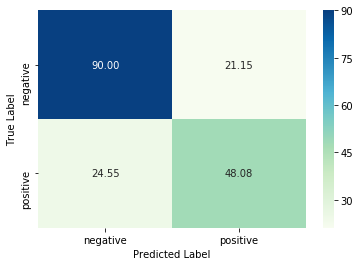

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [24]:
print(classification_report(y_test, y_predict, target_names=target_names))

             precision    recall  f1-score   support

   negative       0.79      0.90      0.84       220
   positive       0.69      0.48      0.57       104

avg / total       0.76      0.77      0.75       324



# Random Forest

10-Folds Cross Validation Training Accuracy

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf =  RandomForestClassifier(n_estimators=500, min_samples_split=2, random_state=0)
np.mean(cross_val_score(clf, X_train_norm, y_train, cv=10))

/data/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.6924999999999999

Test Accuracy

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

0.7283950617283951

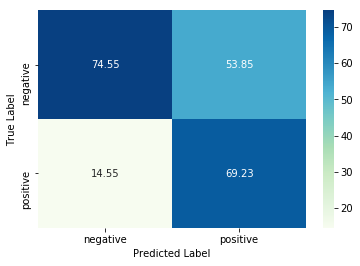

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [28]:
print(classification_report(y_test, y_predict, target_names=target_names))

             precision    recall  f1-score   support

   negative       0.84      0.75      0.79       220
   positive       0.56      0.69      0.62       104

avg / total       0.75      0.73      0.73       324



# XGBoost

10-Folds Cross Validation Training Accuracy

In [29]:
#!pip install xgboost  // If you dont have XGBoost
import xgboost as xgb
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,b
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
np.mean(cross_val_score(clf, X_train_norm, y_train, cv=10))

/data/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/data/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/data/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/data/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

0.7100000000000001

Test Accuracy

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

/data/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7253086419753086

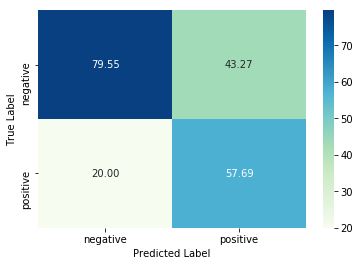

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [36]:
print(classification_report(y_test, y_predict, target_names=target_names))

             precision    recall  f1-score   support

   negative       0.80      0.80      0.80       220
   positive       0.57      0.58      0.57       104

avg / total       0.73      0.73      0.73       324



# Save Data to SVM format for Optimization

In [30]:
from sklearn.datasets import dump_svmlight_file
dump_svmlight_file(X_train_norm, y_train, 'training.svm',zero_based=False)
dump_svmlight_file(X_test_norm,y_test,'test.svm',zero_based=False)